## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

In this step, all the necessary Python libraries are imported.  
These include libraries for data handling, machine learning, evaluation metrics, and visualization.

Importing everything at the beginning keeps the notebook organized and ensures that all required tools are available for later steps.

## Loading the Dataset

In [2]:
df = pd.read_csv("8data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Here, the breast cancer dataset is loaded from a CSV file into a Pandas DataFrame.  
Displaying the first few rows helps confirm that the dataset has been loaded correctly and gives an initial idea of the available features and the target variable.

## Understanding the Dataset

Before applying any machine learning algorithm, it is important to understand the structure of the dataset.  
In the next steps, we:
- Check the number of rows and columns  
- View the column names  
- Inspect data types  
- Ensure there are no missing values 

In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

(This confirms that the dataset is clean and ready for preprocessing.)

## Encoding the Target Variable

The `diagnosis` column contains categorical values (`M` for malignant and `B` for benign).  
Since machine learning models require numerical input, these labels are encoded as:
- Malignant → 1  
- Benign → 0  

This conversion allows the model to process the target variable correctly.

In [7]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Separating Features and Target

After encoding, the dataset is divided into:
- **Features (X):** All tumor measurement columns  
- **Target (y):** The diagnosis column  

This separation clearly defines the inputs given to the model and the output it needs to predict.

In [8]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

## Train–Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

To evaluate the model fairly, the data is split into training and testing sets:
- 80% of the data is used for training  
- 20% of the data is used for testing  

Stratified sampling is used to maintain the same proportion of malignant and benign cases in both sets, which is especially important for medical datasets.

## Creating the KNN Pipeline

### Building the KNN Pipeline:
A machine learning pipeline is created to handle preprocessing and classification in a clean and safe way.

The pipeline includes:
- Mean imputation to handle missing values
- Feature scaling using StandardScaler
- K-Nearest Neighbors classifier with k = 5

Using a pipeline ensures that all preprocessing steps are applied consistently and prevents data leakage.

In [10]:
knn_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # handles NaNs
    ("scaler", StandardScaler()),                  # scales features
    ("knn", KNeighborsClassifier(n_neighbors=5))   # KNN
])

## Train the KNN model

In [11]:
knn_pipeline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())])

The KNN pipeline is trained using the training dataset.  
During this step, the model learns patterns by comparing distances between tumor samples.

## Evaluating the Base Model

In [13]:
y_pred = knn_pipeline.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.956140350877193
Precision: 0.9743589743589743
Recall   : 0.9047619047619048
F1 Score : 0.9382716049382716


/opt/anaconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


After training, the model is evaluated using the test dataset.  
Multiple performance metrics are used to ensure a reliable evaluation:
- **Accuracy:** Overall correctness  
- **Precision:** Correctness of malignant predictions  
- **Recall:** Ability to detect malignant cases  
- **F1-score:** Balance between precision and recall  

Using multiple metrics is crucial in healthcare-related tasks.

## Feature Ablation Study

Feature ablation is used to understand the importance of individual features.  
The idea is to remove one feature at a time, retrain the model, and observe how performance changes.

If removing a feature causes a noticeable drop in performance, that feature is considered important.

In [14]:
results = []

for feature in X.columns:
    
    X_temp = X.drop(columns=[feature])
    
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_temp, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ])
    
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_te)
    
    results.append({
        "Removed Feature": feature,
        "Accuracy": accuracy_score(y_te, y_pred),
        "Precision": precision_score(y_te, y_pred),
        "Recall": recall_score(y_te, y_pred),
        "F1 Score": f1_score(y_te, y_pred)
    })

/opt/anaconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/p

## How Feature Ablation Was Performed

For each feature in the dataset:
- One feature was removed  
- The data was split again into training and testing sets  
- Feature scaling was applied again  
- A KNN model with k = 5 was retrained  
- Accuracy, precision, recall, and F1-score were recorded  

Only one feature was removed at a time to ensure a fair comparison.

## Collecting Feature Ablation Results
After performing the feature ablation study and recording the performance metrics for each removed feature, the results are stored in a structured format for easier analysis.

In [15]:
ablation_df = pd.DataFrame(results)
ablation_df.sort_values(by="Accuracy")

,Removed Feature,Accuracy,Precision,Recall,F1 Score
10,fractal_dimension_mean,0.938596,0.972973,0.857143,0.911392
27,concavity_worst,0.938596,0.972973,0.857143,0.911392
15,smoothness_se,0.947368,0.973684,0.880952,0.925000
20,fractal_dimension_se,0.947368,0.973684,0.880952,0.925000
9,symmetry_mean,0.947368,0.973684,0.880952,0.925000
19,symmetry_se,0.947368,0.973684,0.880952,0.925000
7,concavity_mean,0.947368,0.973684,0.880952,0.925000
18,concave points_se,0.947368,0.973684,0.880952,0.925000
5,smoothness_mean,0.947368,0.973684,0.880952,0.925000
2,texture_mean,0.947368,1.000000,0.857143,0.923077


In this step, the recorded results are converted into a table so that the impact of removing each feature can be clearly compared across accuracy, precision, recall, and F1-score.

## Identifying the Most Important Features

In [ ]:
ablation_df.sort_values(by="Accuracy")

To understand which features are most important for the KNN model, the ablation results are sorted based on accuracy.

When a feature is removed and the model’s accuracy drops significantly, it indicates that the removed feature plays an important role in classification.  
Features whose removal causes only a small change in accuracy are considered less influential.

## Visualization of Feature Importance

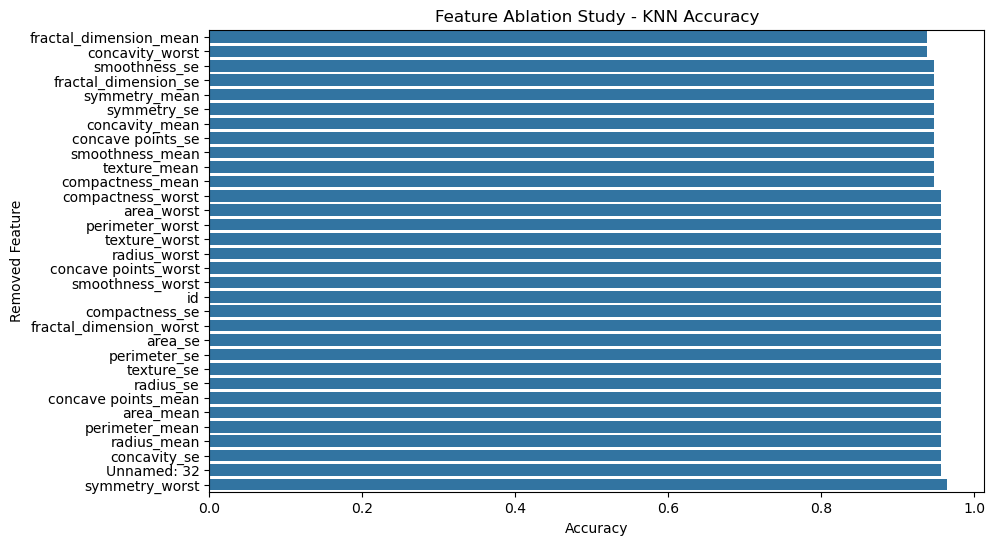

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ablation_df.sort_values("Accuracy"),
    x="Accuracy",
    y="Removed Feature"
)
plt.title("Feature Ablation Study - KNN Accuracy")
plt.show()

A bar chart was used to visualize accuracy values after removing each feature.  
This visualization makes it easy to quickly identify which features have the greatest impact on the model’s performance.

From the visualization, it is clear that features related to tumor size and shape, such as radius, area, perimeter, and concavity, play a major role in breast cancer classification.